In [128]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix




In [129]:
# Data collection n Preprocessing
cdf = pd.read_csv("D:\Machine Learning Projects\Car price prediction\Csvs\CAR DETAILS FROM CAR DEKHO.csv")

In [130]:
# Inspecting the top 5 rows
cdf.head()
# Fuel_type , seller_type and transmission are categorical features

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [131]:
cdf.shape

(4340, 8)

In [132]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [133]:
cdf.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [134]:
cdf.isnull().sum()
# Contains no null values

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [135]:
print(cdf.fuel.value_counts())
print(cdf.seller_type.value_counts())
print(cdf.transmission.value_counts())
print(cdf.owner.value_counts())


Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [136]:
# Encoding the categorical datas
cdf.replace({"fuel": {"Petrol": 1, "Diesel": 0, "CNG": 2, "LPG": 3, "Electric": 4}},inplace = True)
cdf.replace({"seller_type":{"Dealer": 1, "Individual": 0, "Trustmark Dealer" : 2}}, inplace = True)
cdf.replace({"transmission": {"Manual": 0 , "Automatic": 1}},inplace = True)
cdf.replace({"owner":{"Second Owner": 1, "First Owner": 0, "Third Owner" : 2 , "Fourth & Above Owner": 3 , "Test Drive Car": 4}}, inplace = True)

In [137]:
cdf.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


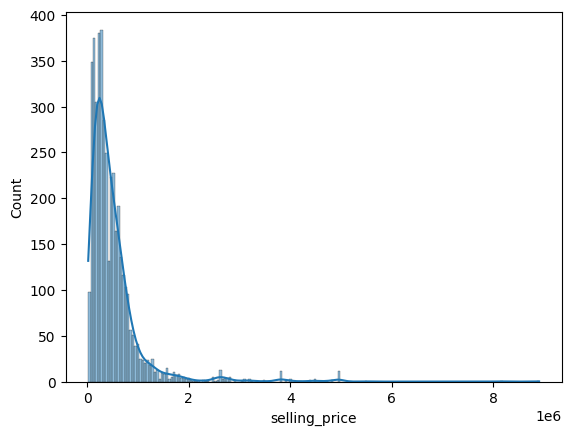

In [138]:
# Some visualization
sns.histplot(x = "selling_price" ,kde = True , data = cdf)
plt.show()


In [139]:
# Splitting the dataset
x = cdf.drop(["name", "selling_price"], axis = 1)
y = cdf["selling_price"]

In [140]:
print(x)
print(y)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [141]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size= 0.8, random_state= 2)


In [142]:
# Model Training
lr = LinearRegression()

In [143]:
lr.fit(x_train, y_train)

LinearRegression()

In [144]:
# Model evaluation 
lr_predict = lr.predict(x_train)
# error R square
error_score = metrics.r2_score(y_train, lr_predict)
print("Error r square value: ",error_score)

Error r square value:  0.4392241063704889


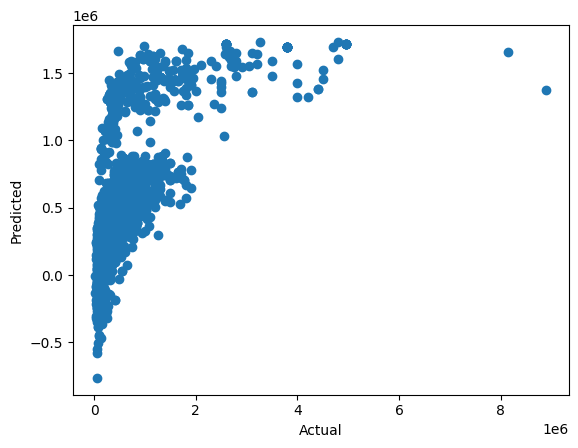

In [145]:
# Visualizing the actual and the predicted price 
plt.scatter(y_train,lr_predict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [146]:
test_lr_predict = lr.predict(x_test) 

In [147]:
er_test = metrics.r2_score(y_test, test_lr_predict)
print(er_test)

0.49988298730549374


In [148]:
input_data = (2007, 70000, 1, 0, 0 , 0)
# changing input_data from tuple to numppy array
'''
name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
'''
input_nparr = np.asanyarray(input_data)

# reshaping the data
input_data_reshaped = input_nparr.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)


[47310.10447985]


C:\Users\VIJAY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


From the Prediction we can see the selling price was 3.35 and we predicted as 3.82 we can say out model did well


In [149]:
# Lasso Regression
lsr = Lasso()
lsr.fit(x_train,y_train)
 

Lasso()

In [150]:
# Model evaluation
train_lspredict = lsr.predict(x_train)
error_lsscore = metrics.r2_score(y_train,train_lspredict)
print(error_lsscore)

0.4392241063188461


In [151]:
# Prediction on test data 
test_lspredict = lsr.predict(x_test)
error_lstest = metrics.r2_score(y_test,test_lspredict)
print(error_lstest)


0.49988271066297707


In [152]:
input_data = (2007,70000,1,0 , 0 , 0)
# changing input_data from tuple to numppy array
'''
name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
'''
input_nparr = np.asanyarray(input_data)

# reshaping the data
input_data_reshaped = input_nparr.reshape(1,-1)

prediction = lsr.predict(input_data_reshaped)
print(prediction)


[47310.76474282]


C:\Users\VIJAY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


After comparing we can see slight improvement in the Lassor regression 